### Dataset

This dataset provides detailed multi-layered soil information including topsoil, subsoil, and deep soil characteristics along with crop and fertilizer recommendations. It offers rich and granular data that improves the accuracy of fertilizer prediction models.

**The dataset contains the following features**:

#### **Topsoil Features**
- **Temperature_Topsoil**: Temperature in °C at topsoil layer  
- **Humidity_Topsoil**: Relative humidity in % at topsoil layer  
- **Rainfall_Topsoil**: Annual rainfall in mm at topsoil layer  
- **pH_Topsoil**: Soil pH at topsoil layer  
- **N_Topsoil**: Available Nitrogen in topsoil  
- **P_Topsoil**: Available Phosphorus in topsoil  
- **K_Topsoil**: Available Potassium in topsoil  

#### **Subsoil Features**
- **Temperature_Subsoil**: Temperature in °C at subsoil layer  
- **Humidity_Subsoil**: Relative humidity in % at subsoil layer  
- **Rainfall_Subsoil**: Annual rainfall in mm at subsoil layer  
- **pH_Subsoil**: Soil pH at subsoil layer  
- **N_Subsoil**: Available Nitrogen in subsoil  
- **P_Subsoil**: Available Phosphorus in subsoil  
- **K_Subsoil**: Available Potassium in subsoil  

#### **Deep Soil Features**
- **Temperature_Deepsoil**: Temperature in °C at deep soil layer  
- **Humidity_Deepsoil**: Relative humidity in % at deep soil layer  
- **Rainfall_Deepsoil**: Annual rainfall in mm at deep soil layer  
- **pH_Deepsoil**: Soil pH at deep soil layer  
- **N_Deepsoil**: Available Nitrogen in deep soil  
- **P_Deepsoil**: Available Phosphorus in deep soil  
- **K_Deepsoil**: Available Potassium in deep soil  

#### **Other Features**
- **Soil**: Type of soil (e.g., Clayey, Laterite, Silty clay, Sandy, etc.)  
- **Crop**: Type of crop (e.g., Rice, Coconut)  

#### **Target Variable**
- **Fertilizer**: Recommended fertilizer type  
  - **1. DAP and MOP**: Source of Phosphorus and Potassium  
  - **2. Good NPK**: Soil is sufficient in nutrients; no fertilizer needed  
  - **3. MOP**: Source of Potassium  
  - **4. Urea and DAP**: Source of Nitrogen and Phosphorus  
  - **5. Urea and MOP**: Source of Nitrogen and Potassium  
  - **6. Urea**: Source of Nitrogen only  
  - **7. DAP**: Source of Phosphorus only  

> **Note**:  
> - **DAP** = Diammonium Phosphate  
> - **MOP** = Muriate of Potash

## <center>Method

### i) Exploratory data analysis
For better understanding dataset and their relationship we will use some statistical and visualization function.

In [ ]:
# Importing libraries and packages for basic statistics
import os # To change working directory
import pandas as pd # to read and manipulating data
import numpy as np # to calculate mean and standard deviations

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#### Reading the data as Pandas DataFrame

In [ ]:
# To read 'csv' file with panda library
df = pd.read_csv('./multilayer_soil_dataset.csv')

After reading the dataset, we use head() function to display the dataset and columns function for column name.

In [ ]:
# To display the first 10 rows of dataset
display(df.head(10))

,Temperature_Topsoil,Humidity_Topsoil,pH_Topsoil,N_Topsoil,P_Topsoil,K_Topsoil,Temperature_Subsoil,Humidity_Subsoil,pH_Subsoil,N_Subsoil,P_Subsoil,K_Subsoil,Temperature_Deepsoil,Humidity_Deepsoil,pH_Deepsoil,N_Deepsoil,P_Deepsoil,K_Deepsoil,Soil,Crop,Fertilizer
0,24.87,82.84,6.59,4.0,2.0,2.5,23.92,84.52,6.30,3.86,1.91,2.50,29.57,88.09,6.05,4.32,1.84,2.65,Clayey,rice,DAP and MOP
1,28.69,96.65,6.08,4.0,4.0,4.0,29.86,99.11,6.14,4.04,4.37,3.94,33.04,98.70,6.42,3.75,4.17,3.82,laterite,Coconut,Good NPK
2,20.27,81.64,5.01,4.0,4.0,2.0,20.12,76.67,5.19,4.06,3.48,2.17,20.17,64.54,5.35,4.14,3.86,2.03,silty clay,rice,MOP
3,25.07,95.02,5.55,2.0,2.1,3.5,24.74,90.42,5.49,2.00,2.19,3.55,28.43,86.02,5.90,2.26,2.10,3.99,sandy,Coconut,Urea and DAP
4,25.04,95.90,6.18,2.0,3.9,2.1,25.23,91.05,6.07,1.92,4.05,2.21,23.06,99.01,6.16,1.96,3.49,2.03,coastal,Coconut,Urea and MOP
5,20.82,84.13,6.46,2.5,4.0,3.0,21.65,82.41,6.54,2.48,4.18,2.93,21.94,83.38,6.25,2.25,4.23,2.50,clay loam,rice,Urea
6,25.95,93.41,5.84,2.5,4.0,2.0,27.73,96.07,6.20,2.59,4.23,1.90,24.74,82.40,5.68,2.62,4.20,2.04,alluvial,Coconut,Urea and MOP
7,26.49,80.16,6.98,4.2,2.3,3.2,24.03,82.43,7.06,3.82,2.11,3.16,25.92,90.02,7.40,4.56,2.29,3.39,Clayey,rice,DAP
8,25.01,95.59,6.00,2.0,3.9,2.1,27.38,91.50,6.09,1.94,3.93,2.18,24.45,95.19,6.03,2.02,3.33,1.99,coastal,Coconut,Urea and MOP
9,21.87,80.19,5.95,2.9,3.5,3.9,21.45,71.68,5.78,2.98,3.37,3.75,24.96,92.43,6.22,3.08,3.41,3.78,silty clay,rice,Urea


In [ ]:
# To find Column name
df.columns

Index(['Temperature_Topsoil', 'Humidity_Topsoil', 'pH_Topsoil', 'N_Topsoil',
       'P_Topsoil', 'K_Topsoil', 'Temperature_Subsoil', 'Humidity_Subsoil',
       'pH_Subsoil', 'N_Subsoil', 'P_Subsoil', 'K_Subsoil',
       'Temperature_Deepsoil', 'Humidity_Deepsoil', 'pH_Deepsoil',
       'N_Deepsoil', 'P_Deepsoil', 'K_Deepsoil', 'Soil', 'Crop', 'Fertilizer'],
      dtype='object')

#### Checking the data types and looking for missing values

In next step we gather some information about different rows and columns in Dataset. We used df.shape and df.info() which gives information about the number of rows, columns, column data types, memory usage, etc. Then isnull() function was used which find out whether there are missing values present or not.

In [ ]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(200, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_Topsoil   200 non-null    float64
 1   Humidity_Topsoil      200 non-null    float64
 2   pH_Topsoil            200 non-null    float64
 3   N_Topsoil             200 non-null    float64
 4   P_Topsoil             200 non-null    float64
 5   K_Topsoil             200 non-null    float64
 6   Temperature_Subsoil   200 non-null    float64
 7   Humidity_Subsoil      200 non-null    float64
 8   pH_Subsoil            200 non-null    float64
 9   N_Subsoil             200 non-null    float64
 10  P_Subsoil             200 non-null    float64
 11  K_Subsoil             200 non-null    float64
 12  Temperature_Deepsoil  200 non-null    float64
 13  Humidity_Deepsoil     200 non-null    float64
 14  pH_Deepsoil           200 non-null    float64
 15  N_Deepsoil   

None

**Observations**: <br>
Number of rows = **200** <br>
Number of columns = **24** (**23** feature variables and **1** target variable) <br>
Number of categorical(object) variables = **3**: Soil, Crop, Fertilizer (target variable) <br>
Number of numerical variables = **21**: Temparature, Humidity, Rainfall, pH, N, P, K <br>

In [ ]:
# checking the no. of missing values in the dataset
df.isnull().sum()

,0
Temperature_Topsoil,0
Humidity_Topsoil,0
pH_Topsoil,0
N_Topsoil,0
P_Topsoil,0
K_Topsoil,0
Temperature_Subsoil,0
Humidity_Subsoil,0
pH_Subsoil,0
N_Subsoil,0


**NOTE**: There is no missing values present in this dataset

#### Checking the basic statistics of the variables

Here we used describe() function to get the desciptive statistics of the datset.

In [ ]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temperature_Topsoil,200.0,25.55720,2.544626,20.05,23.8200,25.975,27.3100,29.87
Humidity_Topsoil,200.0,88.56315,6.636224,80.12,82.2250,87.495,94.9300,99.98
pH_Topsoil,200.0,6.21130,0.622228,5.01,5.7600,6.125,6.4400,7.87
N_Topsoil,200.0,3.11550,0.910193,2.00,2.2000,2.500,4.0000,4.20
P_Topsoil,200.0,3.13050,0.929213,2.00,2.0750,3.900,4.0000,4.00
K_Topsoil,200.0,2.95600,0.721364,1.90,2.1000,3.000,3.5000,4.00
Temperature_Subsoil,200.0,25.57390,2.793296,18.62,23.7150,25.825,27.5525,32.26
Humidity_Subsoil,200.0,88.86020,8.132299,70.81,82.4250,88.450,95.6600,111.19
pH_Subsoil,200.0,6.19820,0.680206,4.80,5.7700,6.140,6.5400,8.22
N_Subsoil,200.0,3.09335,0.911755,1.76,2.2100,2.700,4.0100,4.47


  **NOTE**:
- It is observed that the mean and median values of the dataset are similar and thus a symmetrical distribution of the dataset is expected.
- The dataset may contain no extreme outliners. For futher confirmation we will visualize dataset with boxplot.

In [ ]:
# statistics of the category variables
display(df.describe(include='object'))

,Soil,Crop,Fertilizer
count,200,200,200
unique,7,2,7
top,silty clay,rice,Urea and MOP
freq,42,100,42


**NOTE**:
- silty clay soil showed the highest frequency of 42 out of 200 observations
- rice and coconut shared their frequency by 50%, equally
- Urea and MOP fertilizer showed the highest frequency of 42 out of 200 observations

Now, we import matplotlib and seborn library for data visualization.

#### Importing libraries  for data visualization

In [ ]:
!pip install dython

In [ ]:
import matplotlib.pyplot as plt # to visualize graph
import seaborn as sns # for better visualization of graph with the help of Matplotlib
from dython import nominal # to find out correlation and visualize it

**Explore the Target variable: Fertilizer**

In [ ]:
# print the unique class of the Fertilizer
print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['DAP and MOP' 'Good NPK' 'MOP' 'Urea and DAP' 'Urea and MOP' 'Urea '
 'DAP']


<Axes: xlabel='count', ylabel='Fertilizer'>

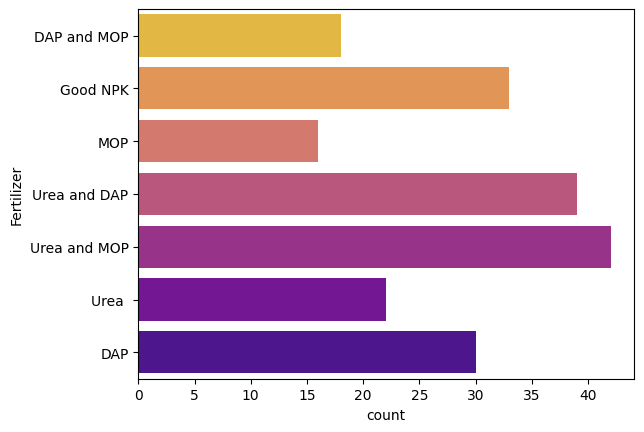

In [ ]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

**NOTE**: A very important plot to visualize the diagonal distribution between two features for all the combinations. It is great to visualize how classes differ from each other in a particular space. Based on the plot shown above, Urea and MOP class is common ones needed for Rice and Coconut, and Need of only 'MOP' is rare one (frequency are lowest).

#### Explore the continuous and categorical feature variables

In [ ]:
# Defining function for Continuous variable and their relationship with target variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Distogram')
    sns.distplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with target variable')
    sns.boxplot(y = x,x = df['Fertilizer'])

#### Univariate Analysis

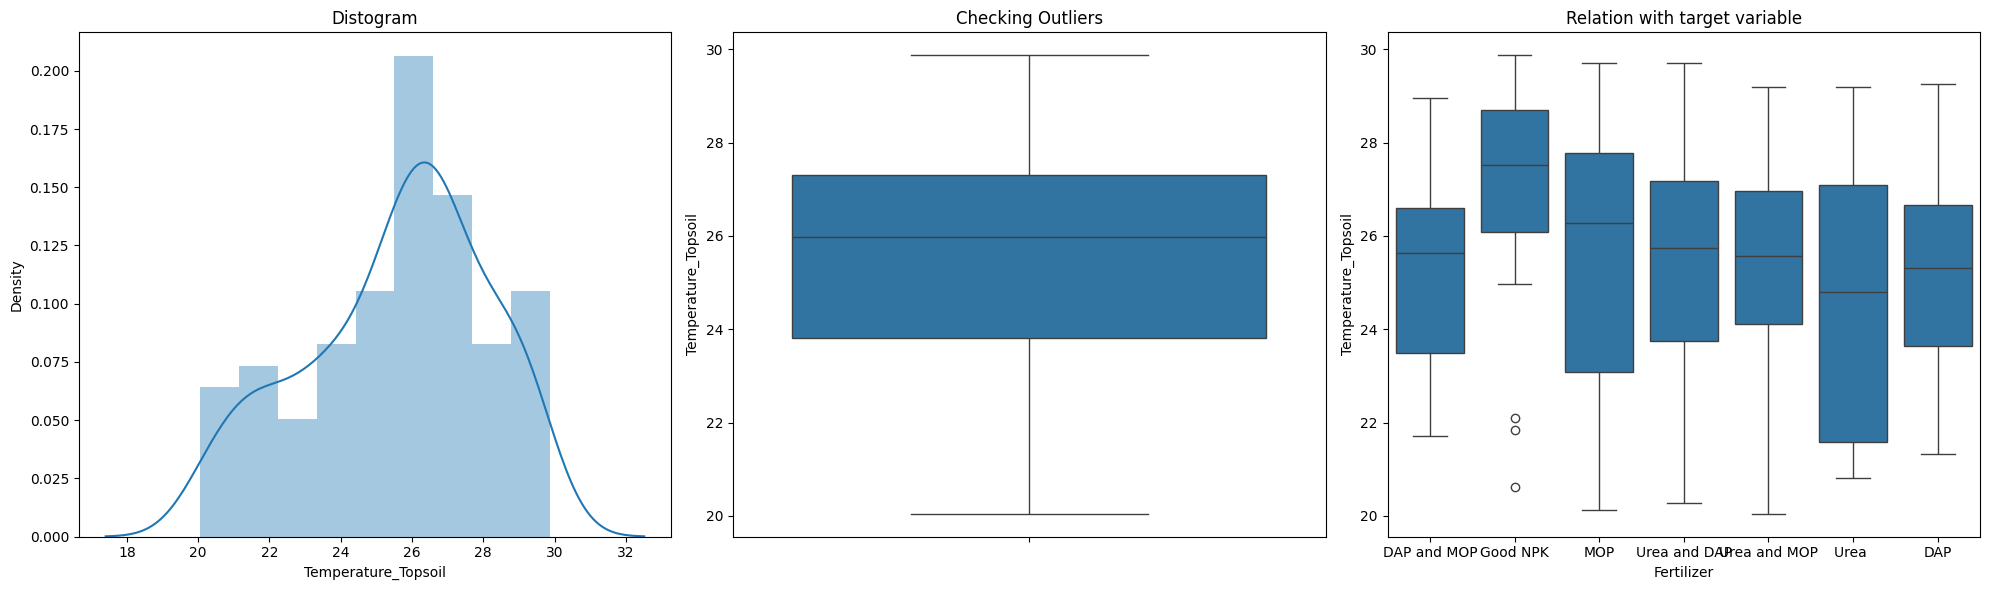

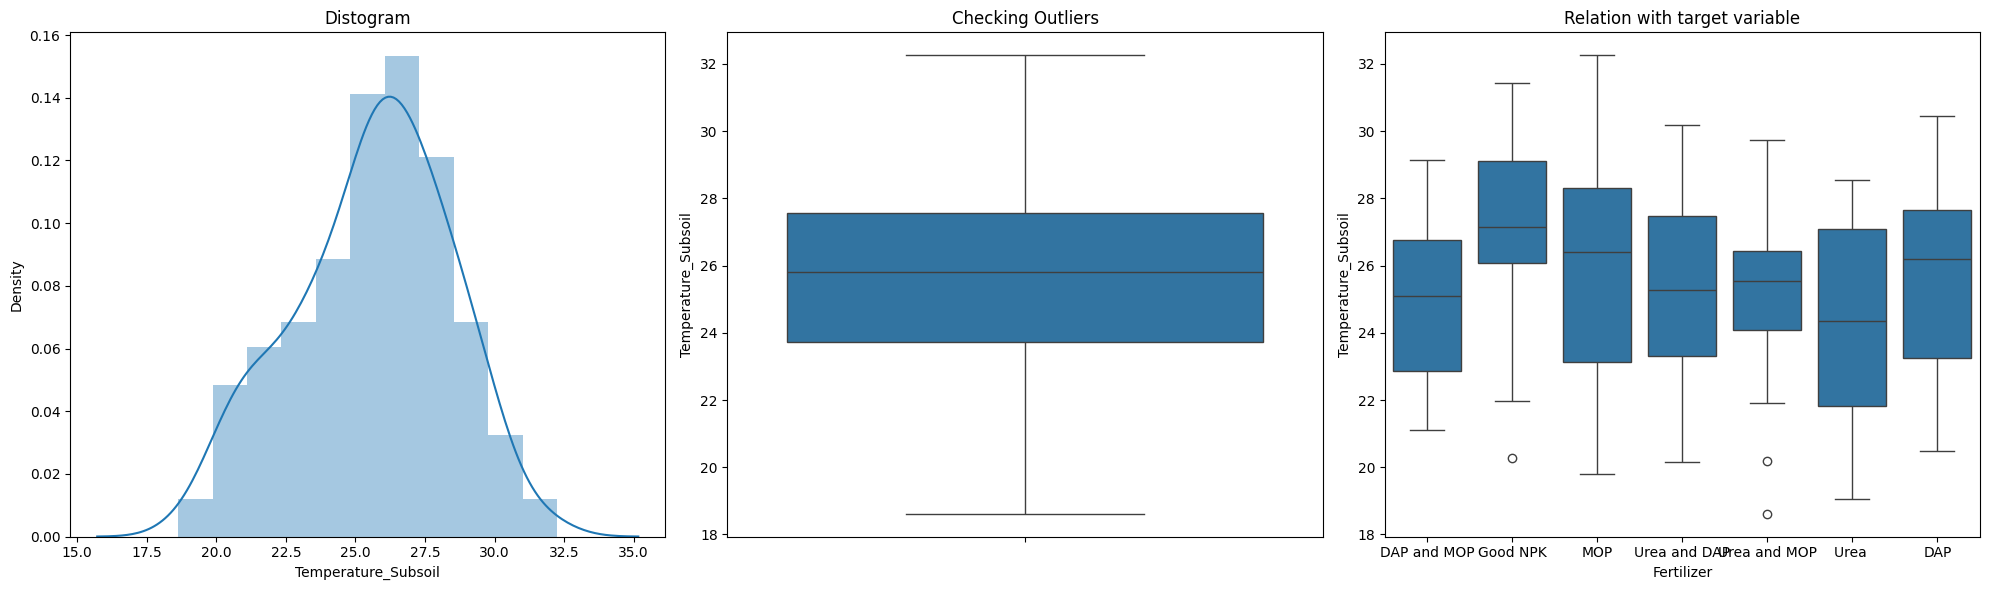

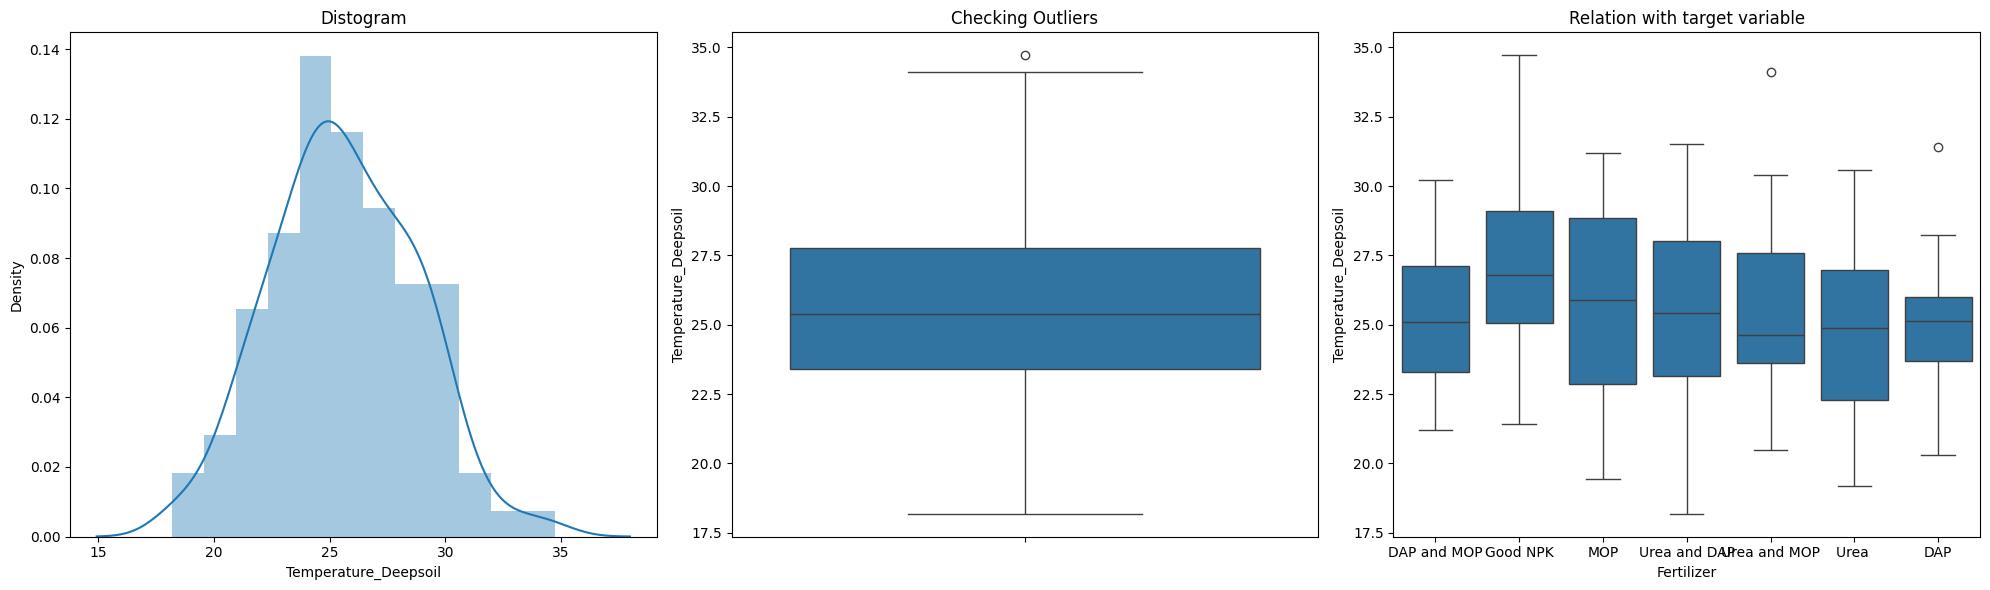

In [ ]:
# EDA - Temparature variable
plot_conti(df['Temperature_Topsoil'])
plot_conti(df['Temperature_Subsoil'])
plot_conti(df['Temperature_Deepsoil'])

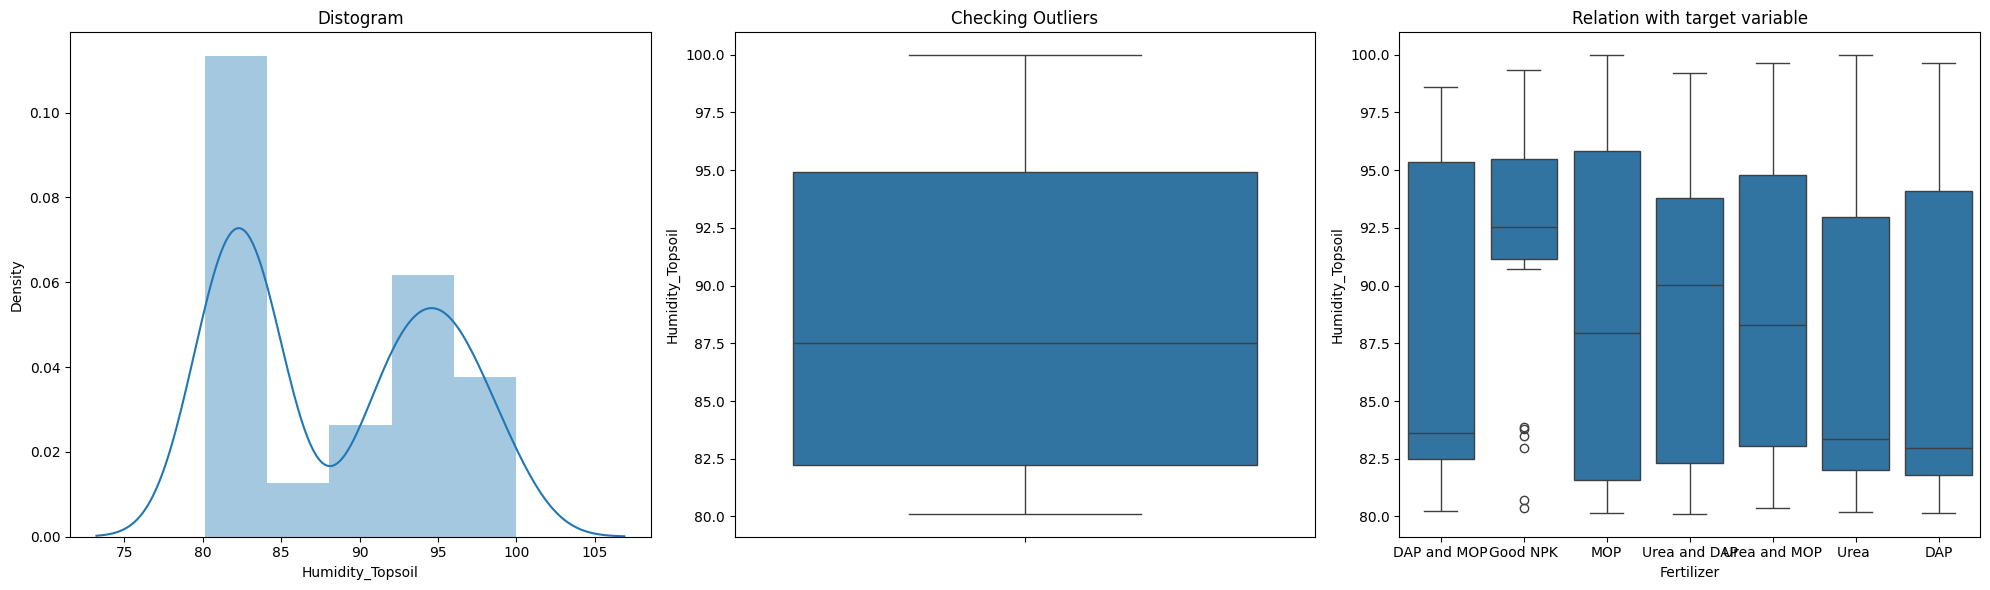

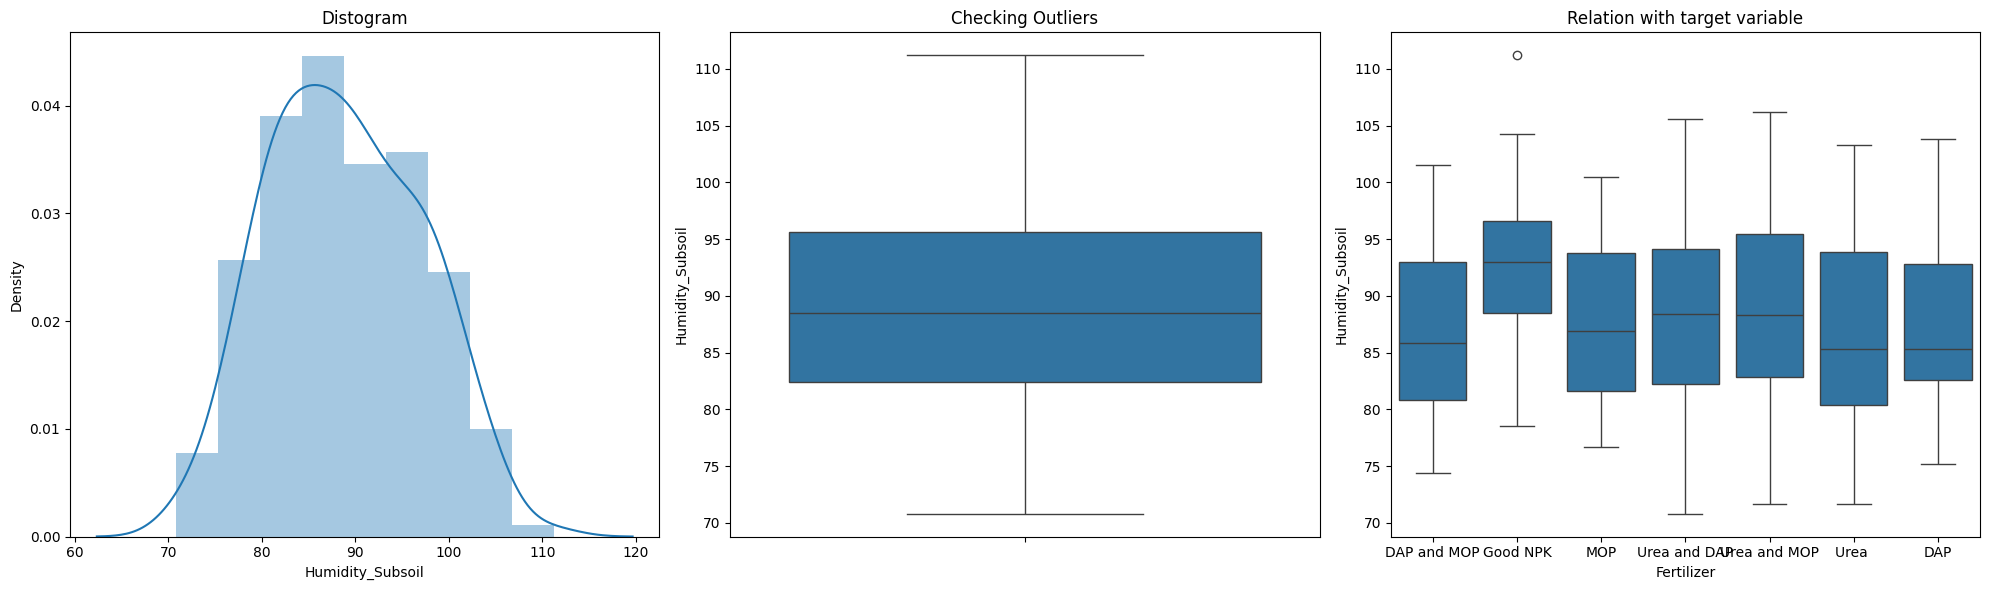

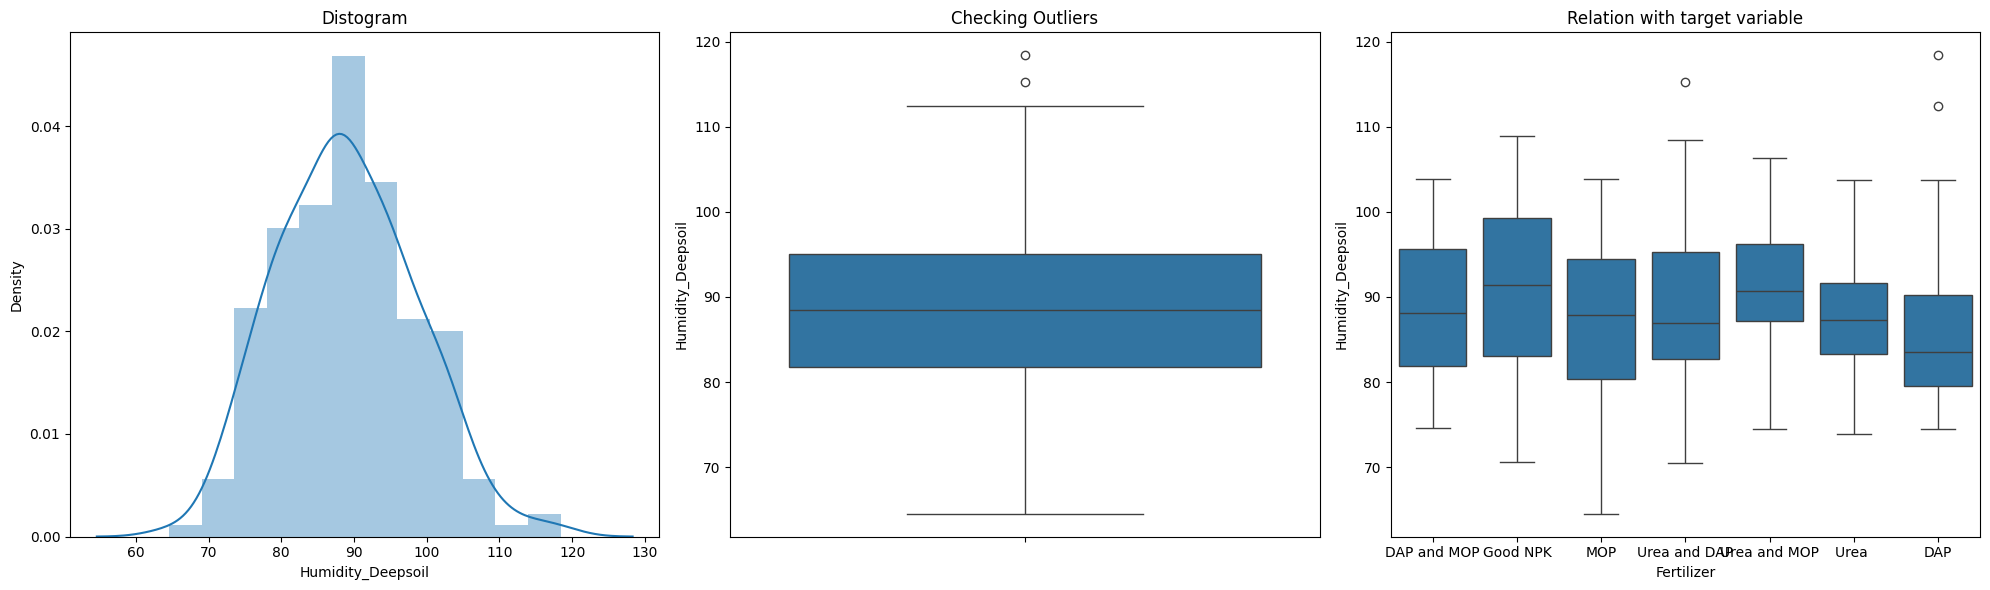

In [ ]:
#EDA - Humidity variable
plot_conti(df['Humidity_Topsoil'])
plot_conti(df['Humidity_Subsoil'])
plot_conti(df['Humidity_Deepsoil'])

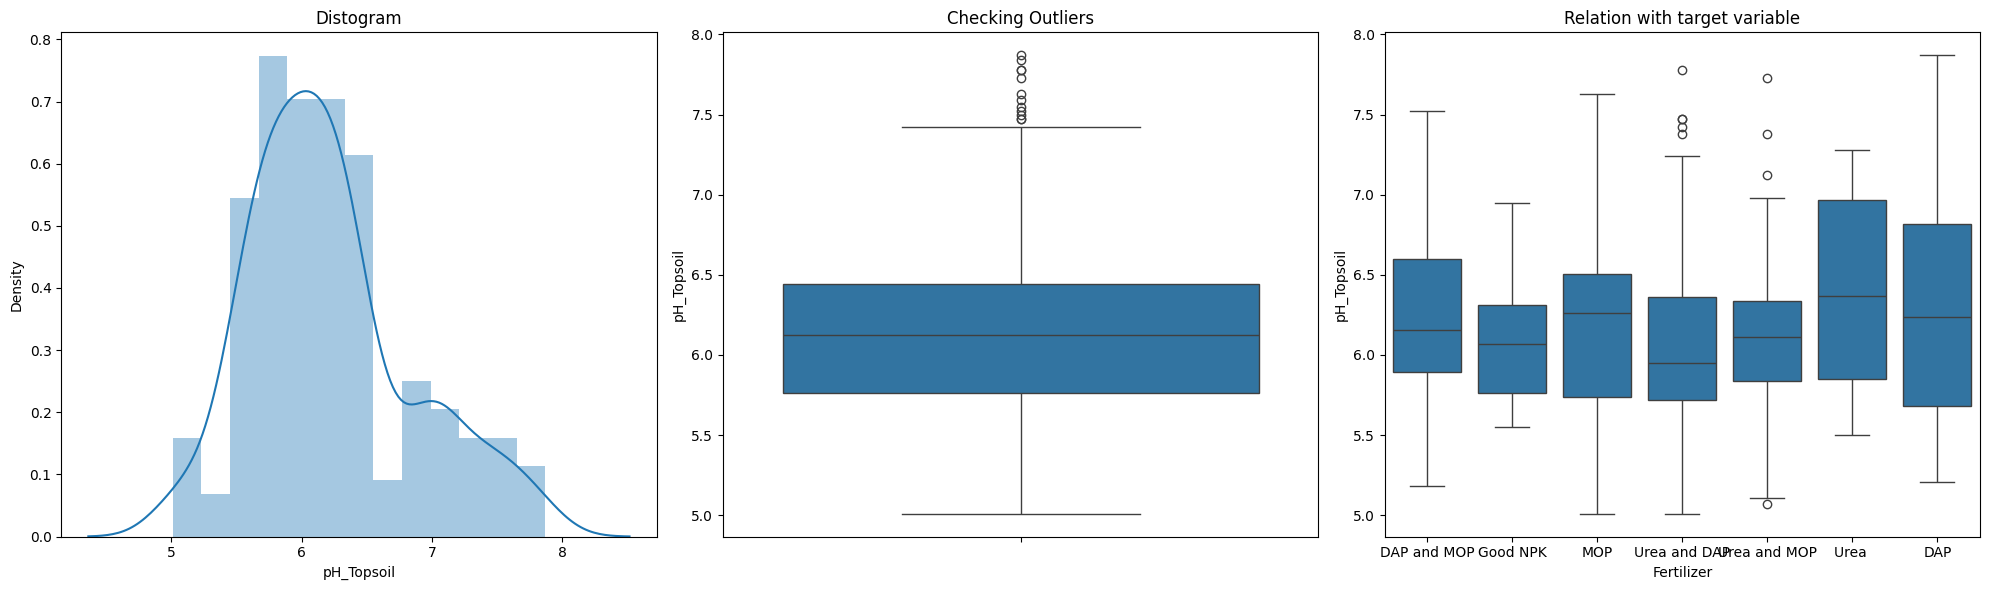

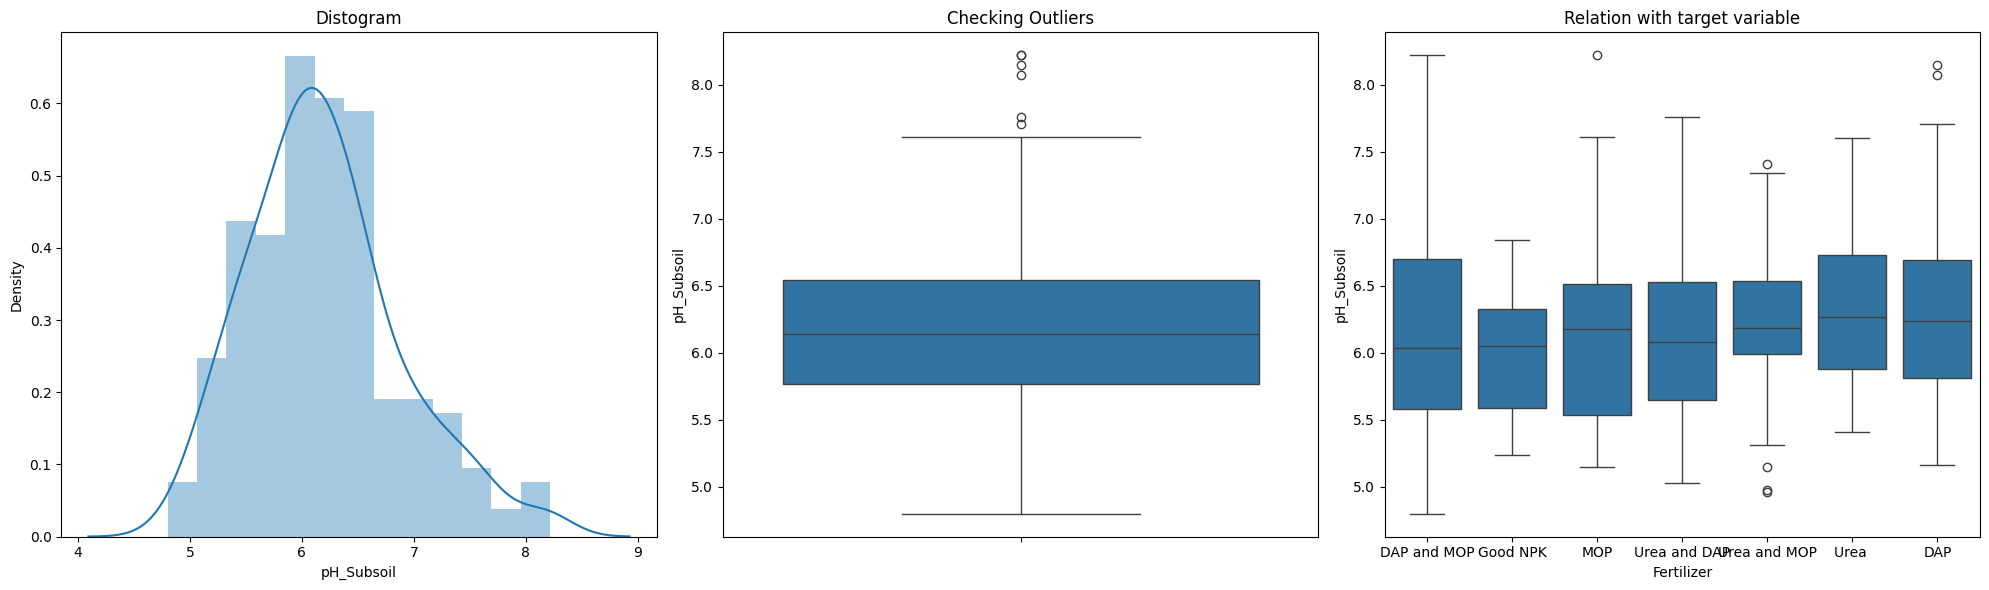

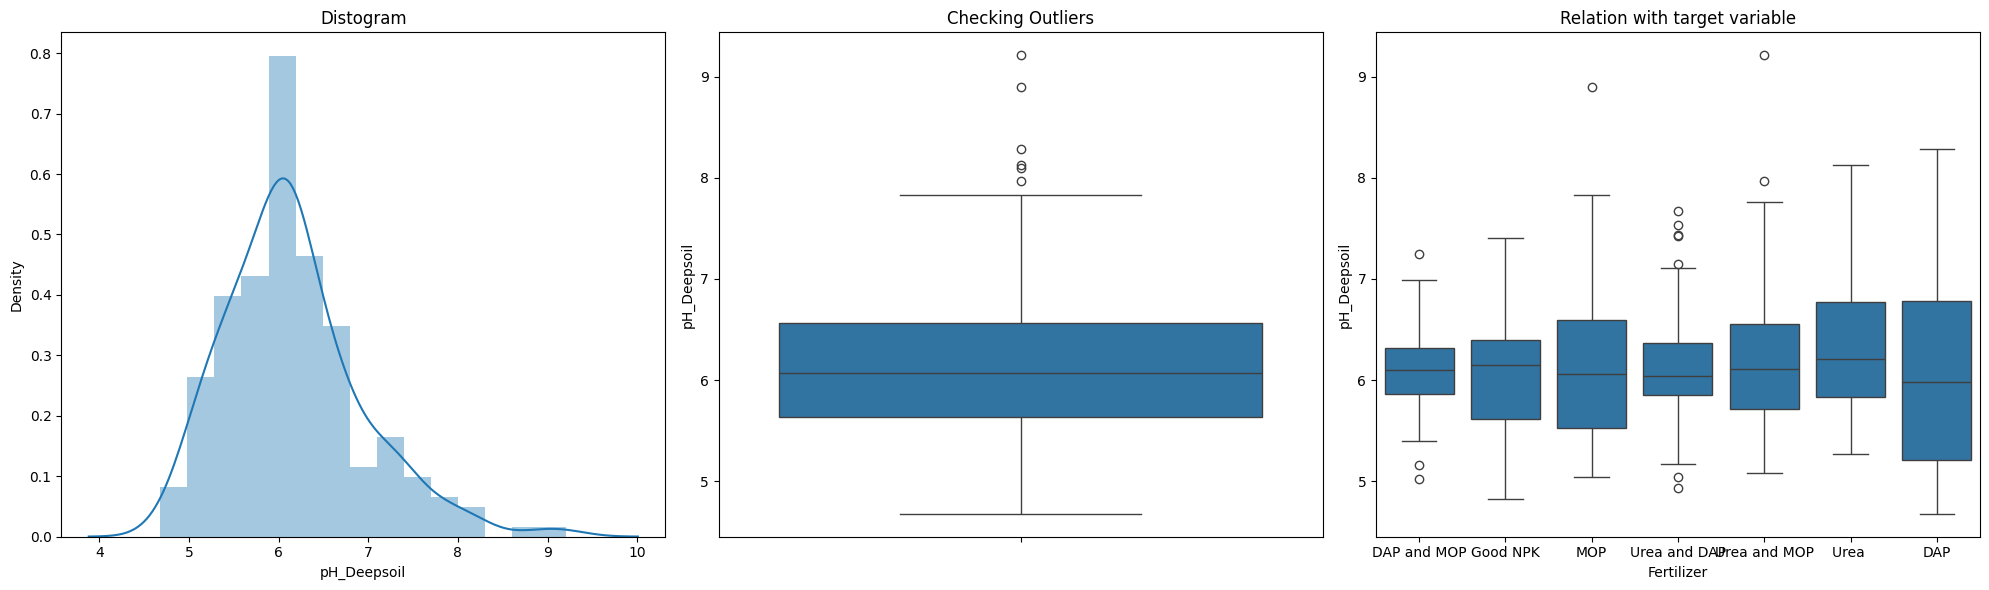

In [ ]:
# EDA - pH variable
plot_conti(df['pH_Topsoil'])
plot_conti(df['pH_Subsoil'])
plot_conti(df['pH_Deepsoil'])

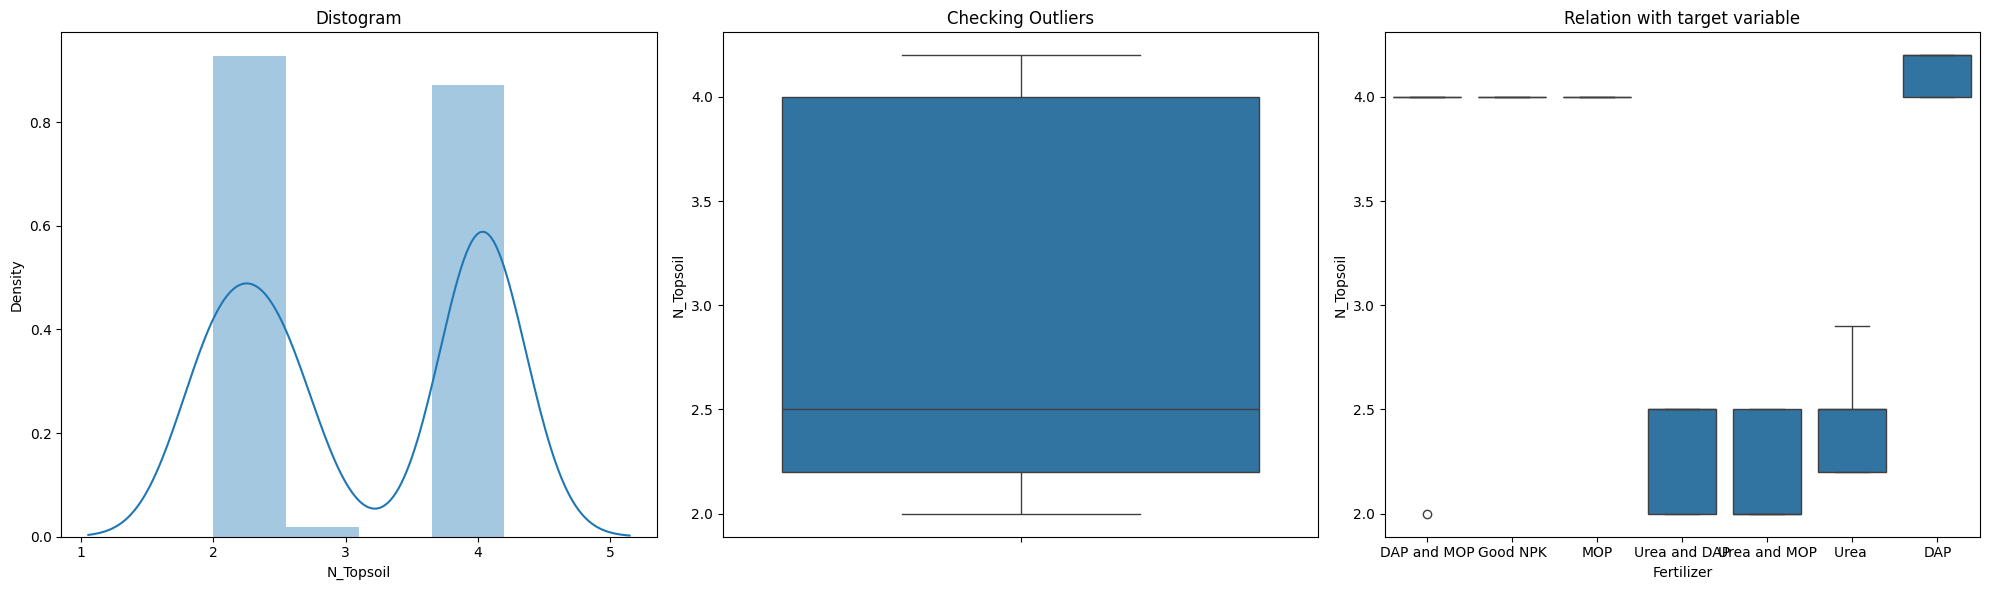

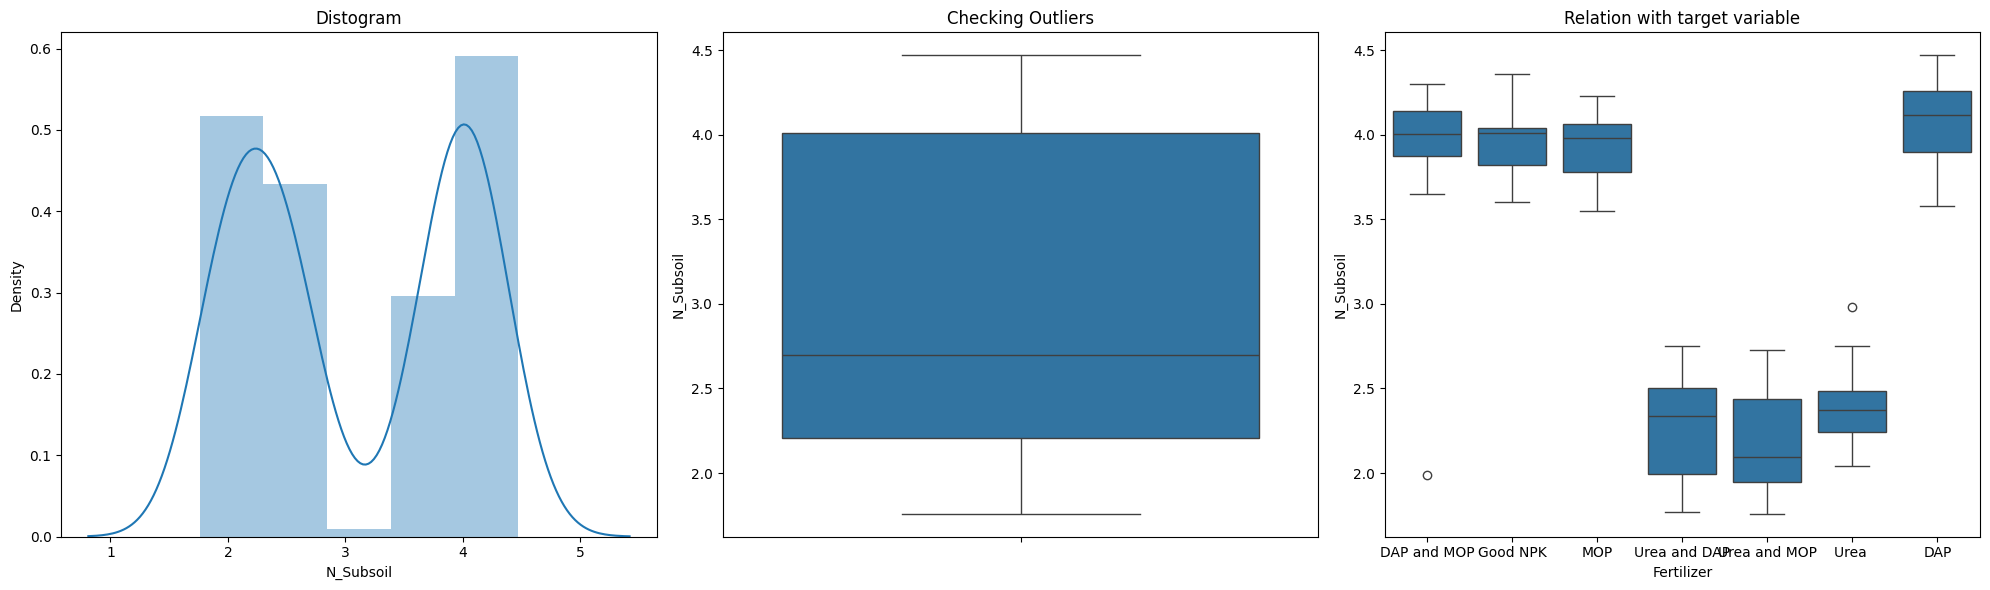

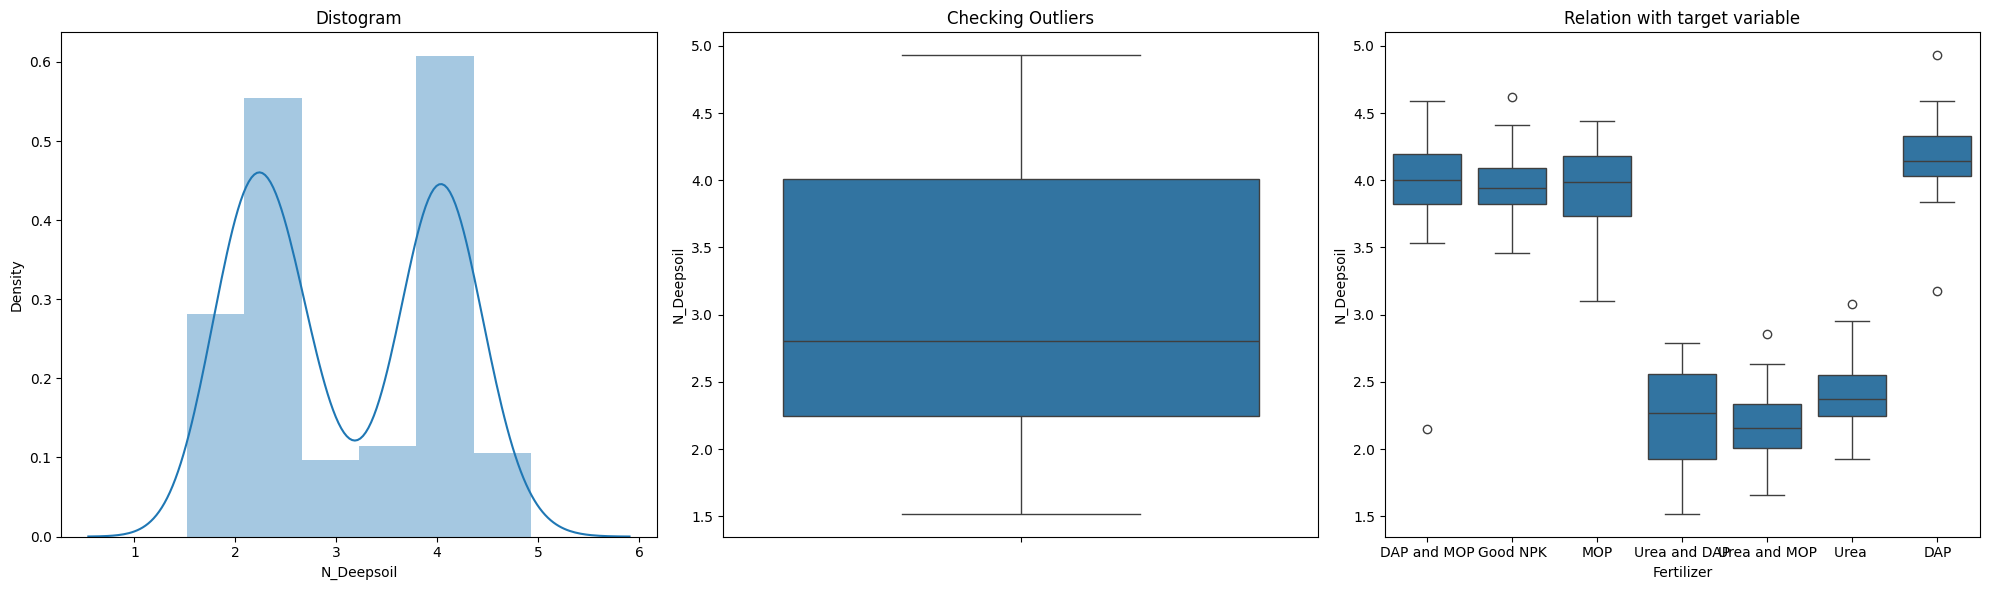

In [ ]:
#EDA - Nitrogen variable
plot_conti(df['N_Topsoil'])
plot_conti(df['N_Subsoil'])
plot_conti(df['N_Deepsoil'])

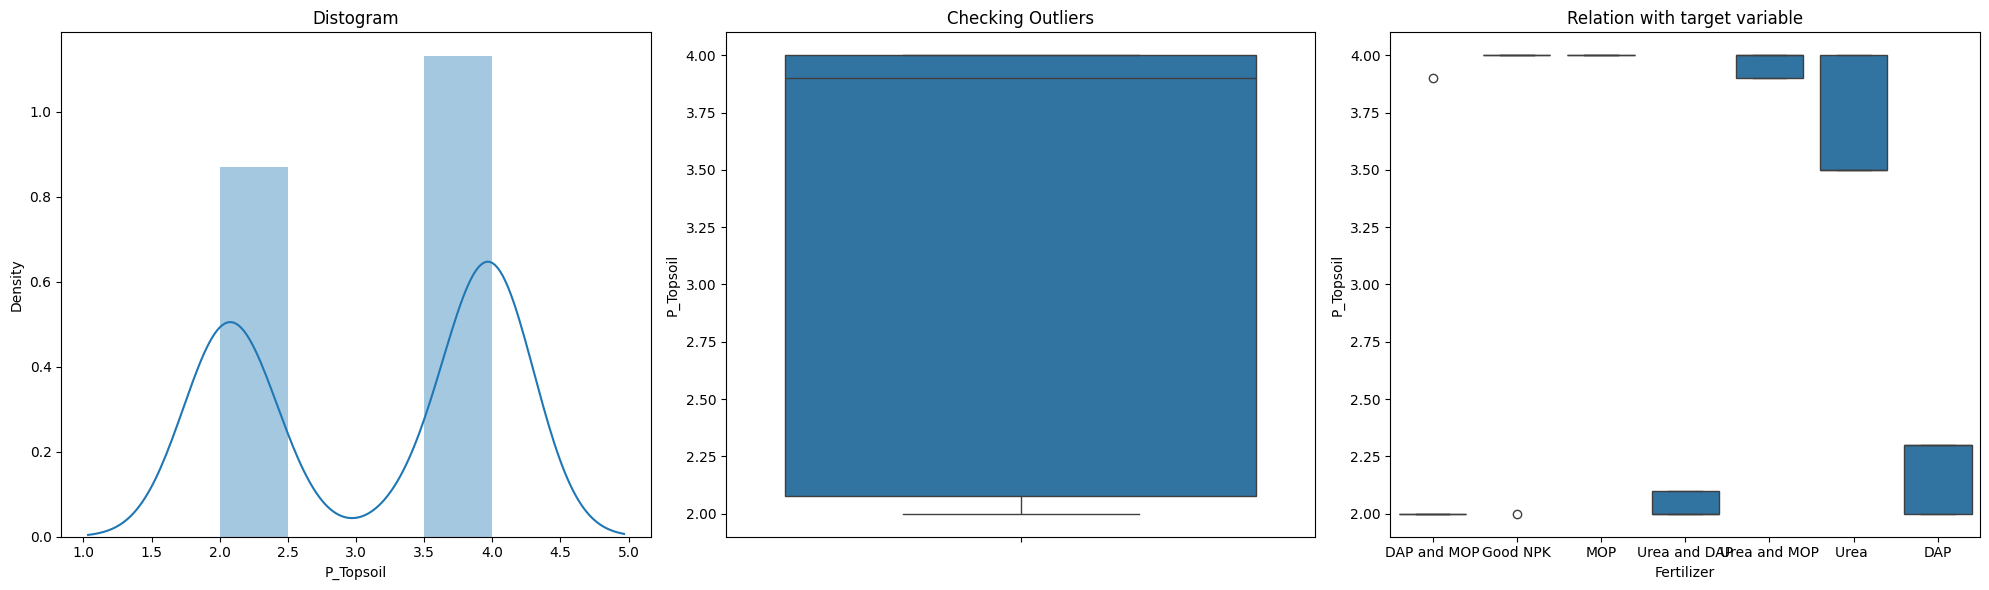

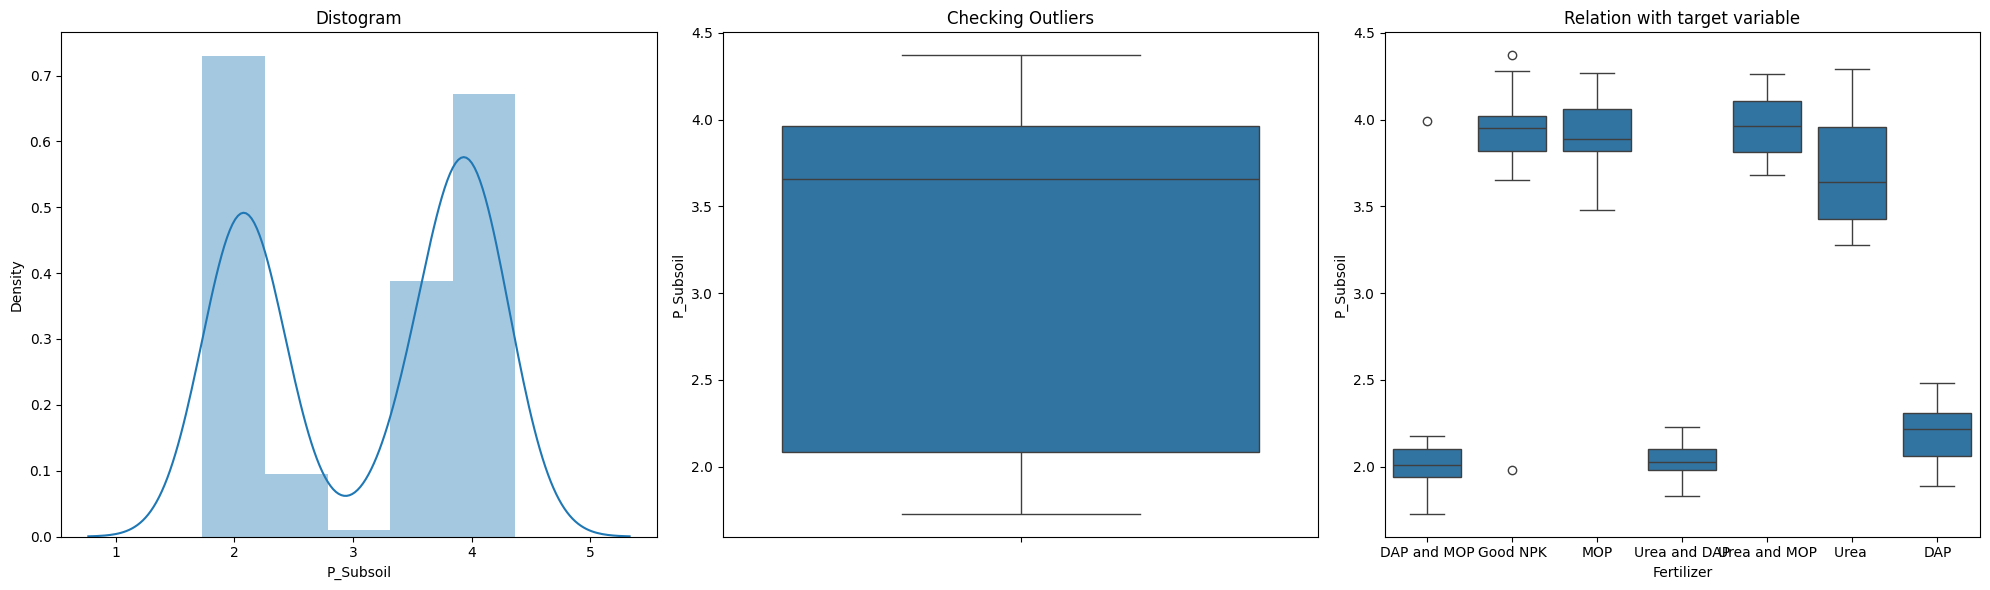

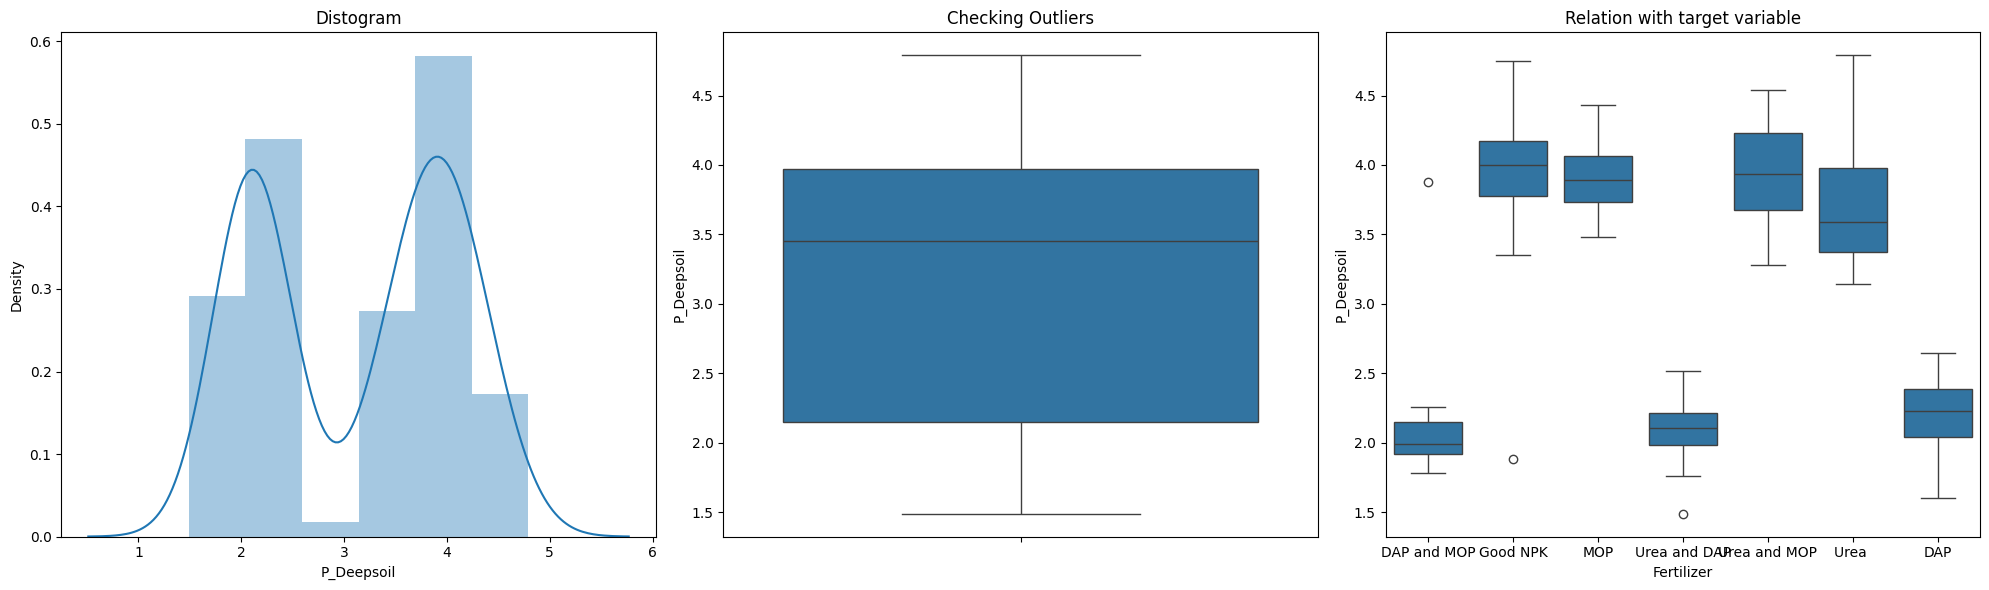

In [ ]:
#EDA - Phosphorus variable
plot_conti(df['P_Topsoil'])
plot_conti(df['P_Subsoil'])
plot_conti(df['P_Deepsoil'])

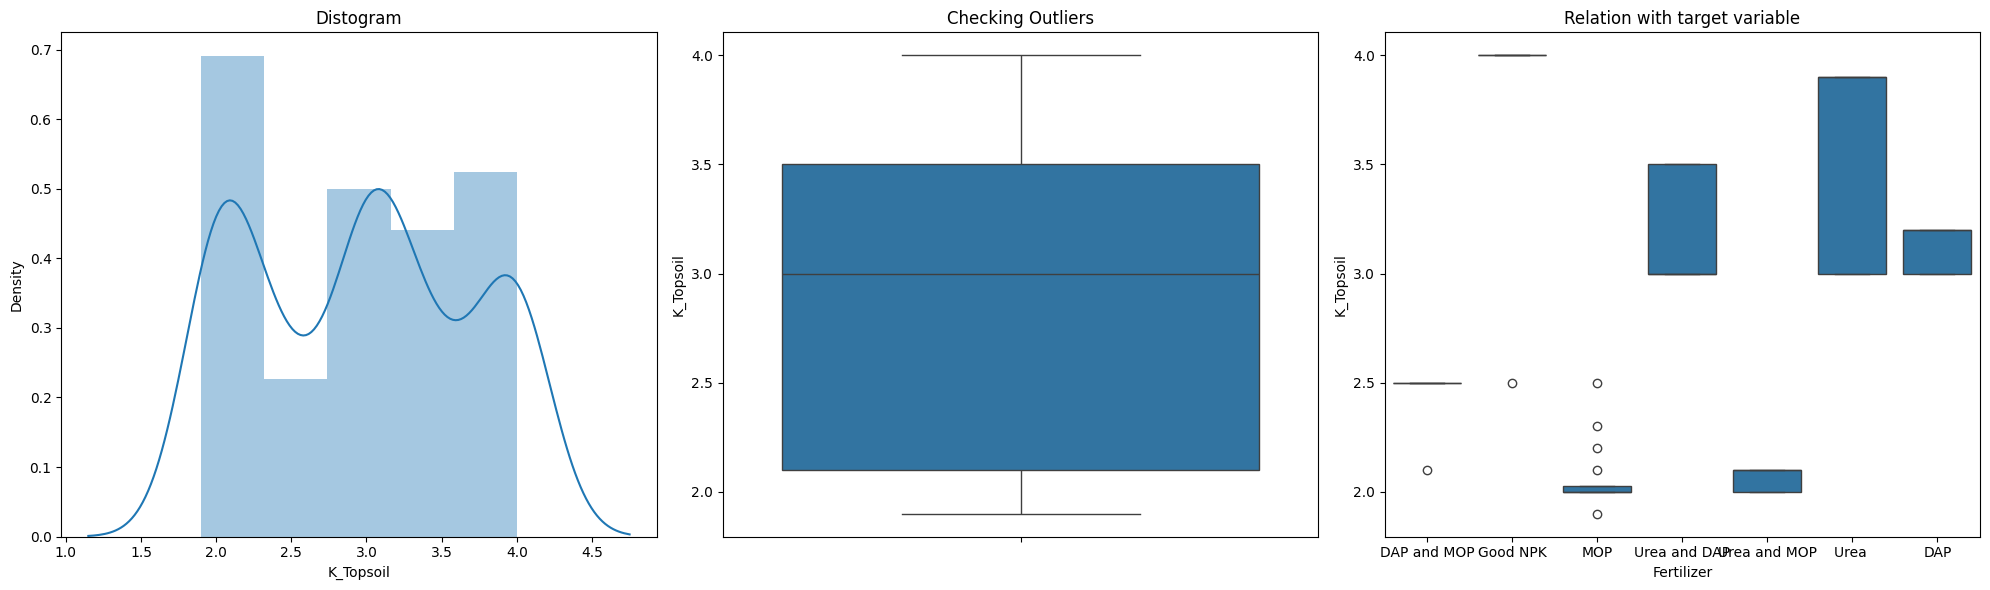

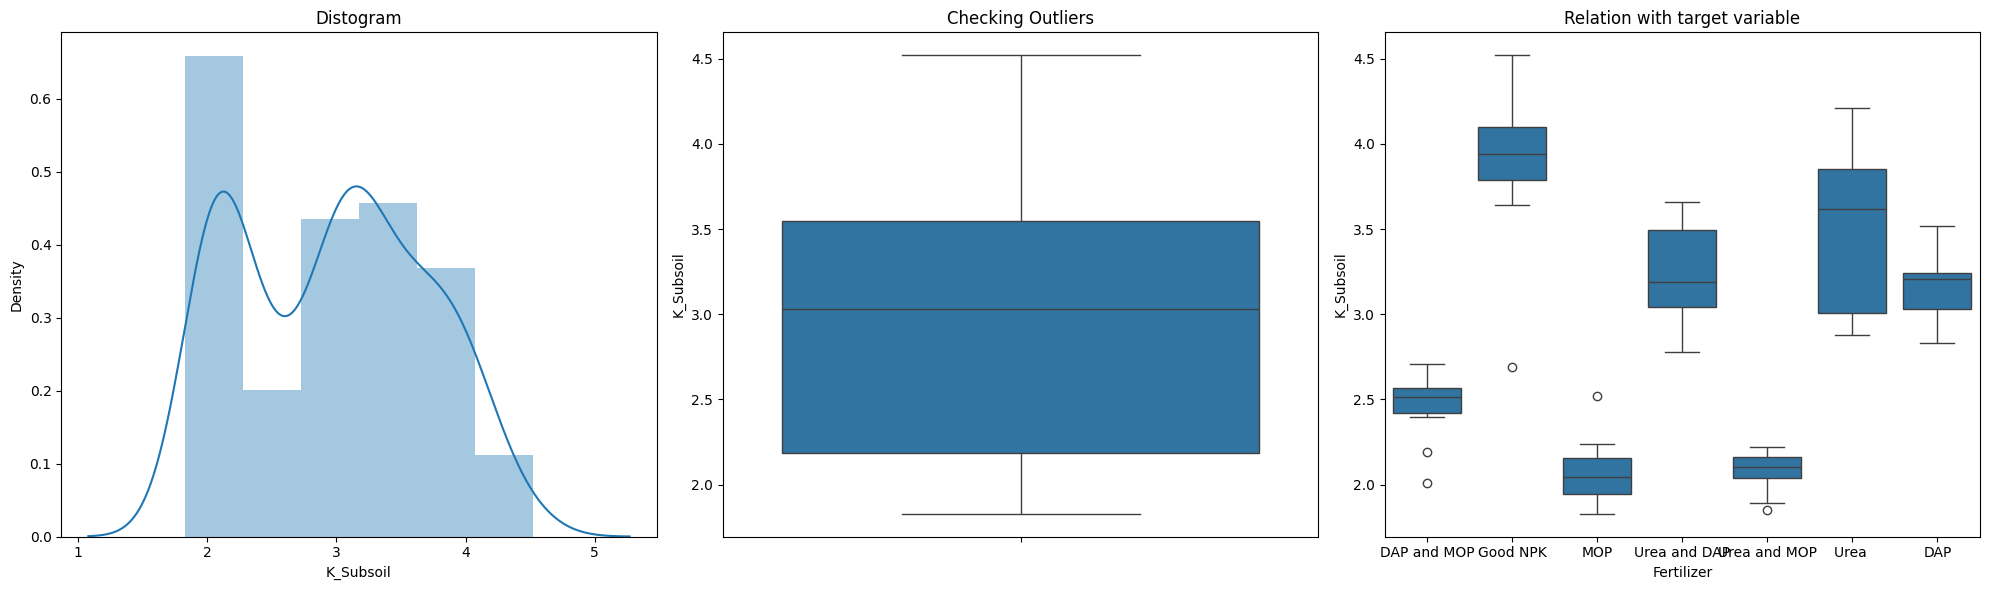

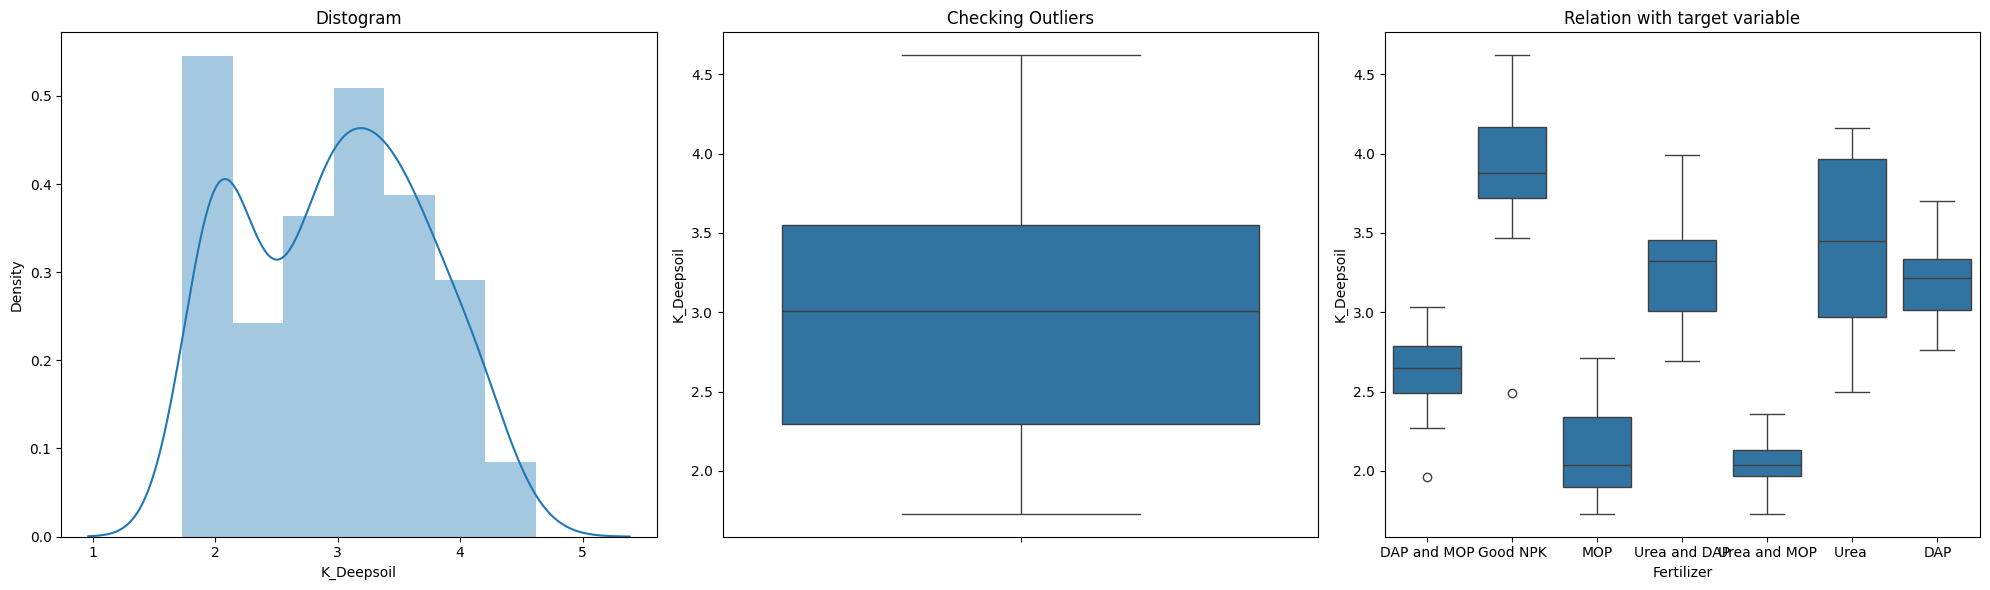

In [ ]:
#EDA - Potassium variable
plot_conti(df['K_Topsoil'])
plot_conti(df['K_Subsoil'])
plot_conti(df['K_Deepsoil'])

**Note:**
From the above distoplot and boxplot, it's clear that the given features are either negetively or positively skewed. In pH there are some outliners present.

In [ ]:
# Defining function to visualize catogorical variable and their relationship with target variable
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer'], ax=axes[1])

In [ ]:
# print the unique types of the Soil
print("Soil : ", df['Soil'].unique())

Soil :  ['Clayey' 'laterite' 'silty clay' 'sandy' 'coastal' 'clay loam' 'alluvial']


**NOTE**: Silty clay and Clayey soil type are most frequent in this dataset. There is no linear relationship between fertilizer and soil. We can guess different types of soil need different type of fertilizer on the basis of their nutrient dificiency.

In [ ]:
# print the unique types of the Crop
print("Crop: ", df['Crop'].unique())

Crop:  ['rice' 'Coconut']


**NOTE**:Rice and Coconut both crop are equally distributed in our dataset. For Coconut cultivation, Urea and DAP and Urea and MOP fertilizer are most common.

#### Bi-Variate Analysis

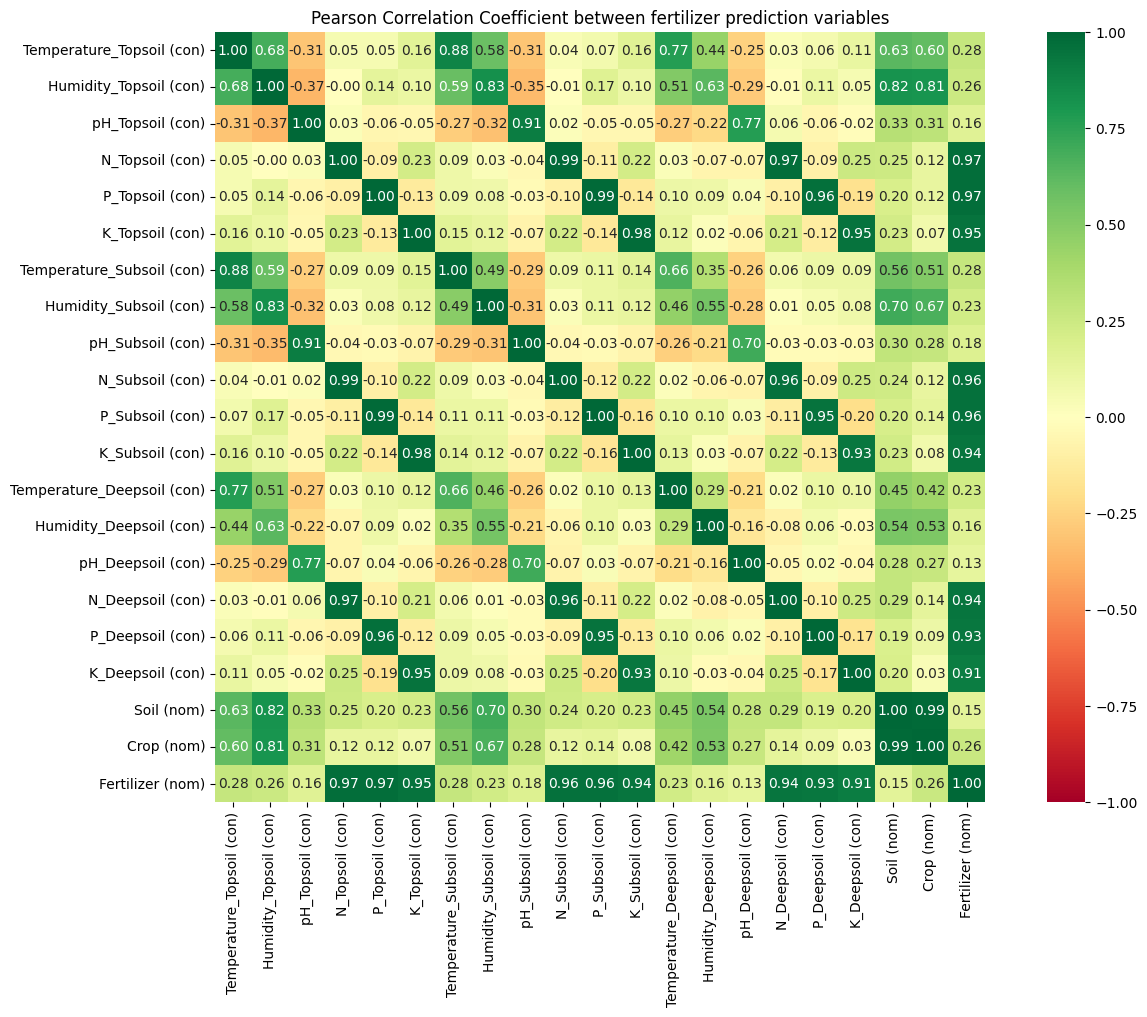

{'corr':                             Temperature_Topsoil (con)  Humidity_Topsoil (con)  \
 Temperature_Topsoil (con)                    1.000000                0.683385   
 Humidity_Topsoil (con)                       0.683385                1.000000   
 pH_Topsoil (con)                            -0.305519               -0.365192   
 N_Topsoil (con)                              0.052297               -0.002303   
 P_Topsoil (con)                              0.052717                0.136661   
 K_Topsoil (con)                              0.155975                0.104165   
 Temperature_Subsoil (con)                    0.882698                0.587752   
 Humidity_Subsoil (con)                       0.580628                0.834197   
 pH_Subsoil (con)                            -0.309940               -0.346275   
 N_Subsoil (con)                              0.038433               -0.007808   
 P_Subsoil (con)                              0.069020                0.166374   
 K_Subso

In [ ]:
#To find out correlation with both nominal and numeric variables
nominal.associations(df,figsize=(16,10),
                     mark_columns=True,
                     title="Pearson Correlation Coefficient between fertilizer prediction variables",
                     cmap='RdYlGn')

**NOTE**:
##### Positive Correlation
- Fertilizer: Amount of N, P, K available in soil, Temperature, Humidity, Rainfall, pH, Crop and Soil types.
- Crop: Soil type, pH, Temperature, Humidity, Rainfall of an area.
- Soil: Temperature, Humidity, Rainfall, pH.

##### Negetive Correlation
- Temperature and Humidity both have negetive correlation with Rainfall, soil pH.
- Rainfall and pH both have negative correlation with P and K.
- P has negative correlation with N and K.

### ii) Data Pre-processing

#### Importing libraries for data pre-processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler # to normalize data
from sklearn.preprocessing import LabelEncoder # to encode object variable to numeric
from sklearn.model_selection import train_test_split # to split data into training and testing sets

#### Create feature set and target

In [ ]:
X = df.drop(['Fertilizer'], axis=1) #feature variables
y = df[['Fertilizer']] #Target variable
print('The shape of feature set, X is ' , X.shape)
print('The shape of target, y is ' , y.shape)

The shape of feature set, X is  (200, 20)
The shape of target, y is  (200, 1)


#### Data transformation

In [ ]:
#Label Encoding
le = LabelEncoder()
df['Fertilizer']= le.fit_transform(df['Fertilizer'])
df['Soil']= le.fit_transform(df['Soil'])
df['Crop']= le.fit_transform(df['Crop'])

In [ ]:
display(df.head())

,Temperature_Topsoil,Humidity_Topsoil,pH_Topsoil,N_Topsoil,P_Topsoil,K_Topsoil,Temperature_Subsoil,Humidity_Subsoil,pH_Subsoil,N_Subsoil,P_Subsoil,K_Subsoil,Temperature_Deepsoil,Humidity_Deepsoil,pH_Deepsoil,N_Deepsoil,P_Deepsoil,K_Deepsoil,Soil,Crop,Fertilizer
0,24.87,82.84,6.59,4.0,2.0,2.5,23.92,84.52,6.30,3.86,1.91,2.50,29.57,88.09,6.05,4.32,1.84,2.65,0,1,1
1,28.69,96.65,6.08,4.0,4.0,4.0,29.86,99.11,6.14,4.04,4.37,3.94,33.04,98.70,6.42,3.75,4.17,3.82,4,0,2
2,20.27,81.64,5.01,4.0,4.0,2.0,20.12,76.67,5.19,4.06,3.48,2.17,20.17,64.54,5.35,4.14,3.86,2.03,6,1,3
3,25.07,95.02,5.55,2.0,2.1,3.5,24.74,90.42,5.49,2.00,2.19,3.55,28.43,86.02,5.90,2.26,2.10,3.99,5,0,5
4,25.04,95.90,6.18,2.0,3.9,2.1,25.23,91.05,6.07,1.92,4.05,2.21,23.06,99.01,6.16,1.96,3.49,2.03,3,0,6


**NOTE**: Machine learning algorithms only understand the number not text, that's the reason we convert our categorical variable to numeric variable. LabelEncoder() function convert unique values of an object variables between 0 to n-1.

In [ ]:
X = df.drop(['Fertilizer'], axis=1) #feature variables
y = df[['Fertilizer']] #Target variable
print('The shape of feature set, X is ' , X.shape)
print('The shape of target, y is ' , y.shape)

The shape of feature set, X is  (200, 20)
The shape of target, y is  (200, 1)


In [ ]:
# normalize the feature(X) columns
scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Temperature_Topsoil,Humidity_Topsoil,pH_Topsoil,N_Topsoil,P_Topsoil,K_Topsoil,Temperature_Subsoil,Humidity_Subsoil,pH_Subsoil,N_Subsoil,P_Subsoil,K_Subsoil,Temperature_Deepsoil,Humidity_Deepsoil,pH_Deepsoil,N_Deepsoil,P_Deepsoil,K_Deepsoil,Soil,Crop
143,0.950102,0.662638,0.475524,0.227273,0.00,0.523810,0.837977,0.860575,0.192982,0.250923,0.113636,0.472119,0.683606,0.423320,0.300221,0.266862,0.166667,0.432526,0.500000,0.0
92,0.837067,0.846928,0.370629,0.909091,0.00,0.285714,0.771994,0.669886,0.210526,0.852399,0.143939,0.278810,0.637024,0.729484,0.381898,0.697947,0.218182,0.262976,0.000000,1.0
195,0.359470,0.174723,0.293706,0.909091,0.00,0.523810,0.386364,0.319217,0.295322,0.800738,0.162879,0.405204,0.329704,0.385629,0.097130,0.486804,0.142424,0.532872,1.000000,1.0
49,0.175153,0.010070,0.709790,0.409091,0.75,0.952381,0.225073,0.133730,0.611111,0.309963,0.655303,0.732342,0.272837,0.340512,0.465784,0.419355,0.587879,0.840830,0.000000,1.0
16,0.430754,0.009063,0.709790,0.909091,0.00,0.523810,0.482405,0.420010,0.517544,0.763838,0.060606,0.438662,0.307320,0.302822,0.474614,0.718475,0.200000,0.515571,1.000000,1.0
186,0.520367,0.151057,0.020979,0.227273,1.00,0.047619,0.459677,0.342496,0.046784,0.210332,0.878788,0.089219,0.684211,0.342369,0.150110,0.325513,0.751515,0.083045,1.000000,1.0
185,0.447047,0.117321,0.328671,0.227273,0.00,0.523810,0.344575,0.185983,0.391813,0.214022,0.075758,0.360595,0.405929,0.406610,0.348786,0.304985,0.224242,0.501730,0.000000,1.0
31,0.584521,0.690836,0.269231,0.909091,1.00,1.000000,0.607038,0.614165,0.216374,0.837638,0.727273,0.929368,0.604961,0.685295,0.211921,0.712610,0.563636,0.733564,0.500000,0.0
154,0.346232,0.235146,0.423077,0.227273,1.00,0.047619,0.390762,0.219168,0.432749,0.269373,0.920455,0.007435,0.343618,0.629038,0.337748,0.281525,0.542424,0.100346,1.000000,1.0
103,0.221996,0.087613,0.674825,0.909091,0.00,0.523810,0.324047,0.350916,0.745614,0.900369,0.071970,0.405204,0.186328,0.276272,0.567329,0.697947,0.166667,0.401384,0.333333,1.0


**NOTE**: We have imported MinMax scaler from scikit-learn machine learning library to convert feature variables in between 0 to 1.

#### Spliting dataset into train and test

In [ ]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of y_test is',  y_test.shape)

Shape of X_train is (140, 20)
Shape of X_test is (60, 20)
Shape of y_train is (140, 1)
Shape of y_test is (60, 1)


**NOTE**: We have splitted the dataset 70% for training and 30% for test dataset.

### iii) Fitting dataset into model

#### Import Required Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
#Convert Data to Pytorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).squeeze()
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).squeeze()

**NOTE**: We convert the dataset into PyTorch tensors. The squeeze() function removes any unnecessary dimensions from the labels.

In [ ]:
#Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


**NOTE**: We wrap our training and testing data into TensorDataset objects and use DataLoader for efficient batch processing during training and evaluation.

In [ ]:
#Define the TabTranformer Model
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, hidden_dim=64, num_heads=4, num_layers=2):
        super(TabTransformer, self).__init__()

        self.transformer = nn.TransformerEncoder(
            encoder_layer=nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads),
            num_layers=num_layers
        )

        self.fc1 = nn.Linear(num_features, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.fc1(x)  # Transform input
        x = self.relu(x)
        x = self.dropout(x)
        x = x.unsqueeze(1)  # Add sequence dimension for Transformer
        x = self.transformer(x)
        x = x.squeeze(1)
        x = self.fc2(x)
        return x

**NOTE:**
We define the TabTransformer model using nn.TransformerEncoder. The model includes:

- An input transformation using Linear layers
- A Transformer encoder for feature learning
- A final classification layer

In [ ]:
#Initializing the model
num_features = X_train.shape[1]
num_classes = len(y_train['Fertilizer'].unique())  # Correct way
model = TabTransformer(num_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Define the Training Loop
def train(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

train(model, train_loader, criterion, optimizer)

Epoch 1/20, Loss: 2.0776
Epoch 2/20, Loss: 1.4456
Epoch 3/20, Loss: 0.9797
Epoch 4/20, Loss: 0.7507
Epoch 5/20, Loss: 0.7301
Epoch 6/20, Loss: 0.6018
Epoch 7/20, Loss: 0.5147
Epoch 8/20, Loss: 0.4349
Epoch 9/20, Loss: 0.4880
Epoch 10/20, Loss: 0.5767
Epoch 11/20, Loss: 0.5148
Epoch 12/20, Loss: 0.4235
Epoch 13/20, Loss: 0.3786
Epoch 14/20, Loss: 0.4065
Epoch 15/20, Loss: 0.3216
Epoch 16/20, Loss: 0.2769
Epoch 17/20, Loss: 0.3210
Epoch 18/20, Loss: 0.2587
Epoch 19/20, Loss: 0.2215
Epoch 20/20, Loss: 0.2735


#### (iv) Evaluating the model


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.62      1.00      0.77         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.94        60
weighted avg       0.97      0.95      0.95        60



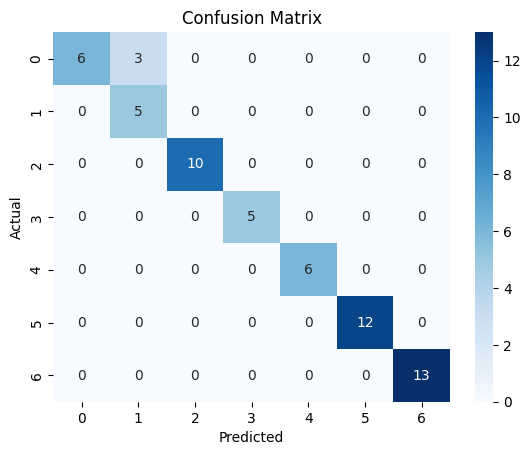

In [ ]:
# 📈 Evaluation
model.eval()
y_pred = []
with torch.no_grad():
    for batch_X, _ in test_loader:
        outputs = model(batch_X)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())

# ✅ Remove .cpu() from y_test (it's a Pandas Series)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
torch.save(model.state_dict(), 'tab_transf_new.pth')

#### Model 2 : FT-Transformer (Feature Tokenizer Transformer)

In [ ]:
pip install tab-transformer-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define Feature Tokenizer Transformer (FT-Transformer)
class FeatureTokenizer(nn.Module):
    def __init__(self, num_features, embed_dim):
        super(FeatureTokenizer, self).__init__()
        self.embed = nn.Linear(num_features, embed_dim)

    def forward(self, x):
        return self.embed(x)

class FTTransformer(nn.Module):
    def __init__(self, num_features, num_classes, embed_dim=64, num_heads=4, num_layers=2):
        super(FTTransformer, self).__init__()
        self.tokenizer = FeatureTokenizer(num_features, embed_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads),
            num_layers=num_layers
        )
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.tokenizer(x)  # Tokenize input features
        x = x.unsqueeze(1)     # Add sequence dimension
        x = self.transformer(x)
        x = x.squeeze(1)       # Remove sequence dimension
        x = self.fc(x)
        return x

In [ ]:
# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model Initialization
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
print(f"Features: {num_features}, Classes: {num_classes}")
model1 = FTTransformer(num_features=num_features, num_classes=num_classes).to(device)

Features: 20, Classes: 7


In [ ]:
# Tensor Conversion
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).squeeze().to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).squeeze().to(device)

In [ ]:
# Dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
# Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
# Training Function
def train(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Train the Model
train(model1, train_loader, criterion, optimizer)

Epoch 1/20, Loss: 1.8718
Epoch 2/20, Loss: 1.0403
Epoch 3/20, Loss: 0.6665
Epoch 4/20, Loss: 0.4296
Epoch 5/20, Loss: 0.3851
Epoch 6/20, Loss: 0.3517
Epoch 7/20, Loss: 0.2680
Epoch 8/20, Loss: 0.2009
Epoch 9/20, Loss: 0.1761
Epoch 10/20, Loss: 0.2008
Epoch 11/20, Loss: 0.1809
Epoch 12/20, Loss: 0.1240
Epoch 13/20, Loss: 0.0986
Epoch 14/20, Loss: 0.0853
Epoch 15/20, Loss: 0.0792
Epoch 16/20, Loss: 0.1139
Epoch 17/20, Loss: 0.1559
Epoch 18/20, Loss: 0.1378
Epoch 19/20, Loss: 0.1031
Epoch 20/20, Loss: 0.0551



Test Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        13

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



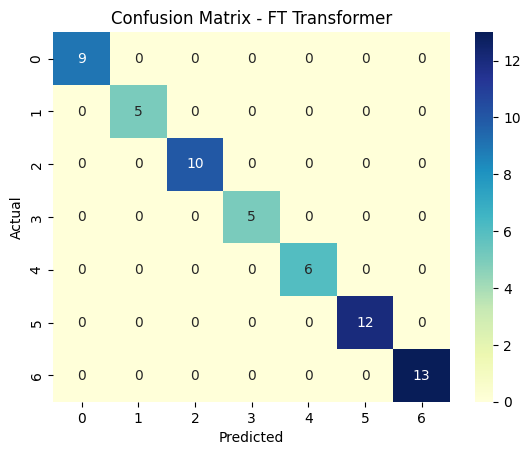

In [ ]:
# Evaluate the Model
model1.eval()
with torch.no_grad():
    y_pred_probs = model1(X_test_tensor)
    y_pred = torch.argmax(y_pred_probs, dim=1).cpu().numpy()

# Compute Accuracy and Report
y_test_np = y_test.values.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test_np, y_pred))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test_np, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - FT Transformer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
torch.save(model1.state_dict(), 'fttransf_new.pth')